In [ ]:
#Import function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv("D:/Data STATBIS ITS/Sem 7/Machine learning/EAS/BRMS.JK.csv")

In [ ]:
#Mari kita periksa beberapa contoh dari data kita
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,50.0,50.0,50.0,50.0,50.0,0.0
1,2019-01-02,50.0,50.0,50.0,50.0,50.0,54500.0
2,2019-01-03,50.0,51.0,50.0,50.0,50.0,7592200.0
3,2019-01-04,50.0,51.0,50.0,50.0,50.0,14309400.0
4,2019-01-07,50.0,55.0,50.0,51.0,51.0,219248800.0


In [ ]:
print("Data Shape -->", data.shape)

Data Shape --> (1212, 7)


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1.211000e+03
mean,110.997287,113.727905,108.338377,110.666886,110.666886,3.370007e+08
std,64.253253,66.026106,62.060897,63.869623,63.869623,5.271088e+08
min,46.984577,46.984577,46.984577,46.984577,46.984577,0.000000e+00
25%,50.000000,50.000000,50.000000,50.000000,50.000000,2.792235e+07
50%,93.000000,95.000000,91.000000,93.000000,93.000000,1.788220e+08
75%,170.000000,174.000000,166.000000,170.000000,170.000000,4.168459e+08
max,300.000000,304.000000,280.000000,294.000000,294.000000,5.488746e+09


In [ ]:
print("Do you have a null column? \n", data.isna().sum())
# Menampilkan nilai yang null
print("Nilai yang null:\n", data[data.isnull().any(axis=1)])

Do you have a null column? 
 Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
Nilai yang null:
            Date  Open  High  Low  Close  Adj Close  Volume
121  2019-06-19   NaN   NaN  NaN    NaN        NaN     NaN


In [ ]:
# Menghapus baris yang mengandung nilai null
data = data.dropna()

In [ ]:
print("Do you have a null column? \n", data.isna().sum())
# Menampilkan nilai yang null

Do you have a null column? 
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#Split data
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [ ]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  968
total length of data -->  1211
Train length -->  968
Test length -->  243


In [ ]:
# Bagian data yang akan kita gunakan sebagai pelatihan
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (928, 40, 1)
y_train shape -->  (928,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
epochs = 100
batch_size = 20

In [ ]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
47/47 [==============================] - 3s 12ms/step - loss: 0.3274
Epoch 2/100
47/47 [==============================] - 1s 13ms/step - loss: 0.2025
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 0.1087
Epoch 4/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0908
Epoch 5/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0647
Epoch 6/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0506
Epoch 7/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0383
Epoch 8/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0303
Epoch 9/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0206
Epoch 10/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0210
Epoch 11/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0198
Epoch 12/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0198
Epoch 13/100
47/47 [=====

In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
969,2022-11-29,176.0,181.0,175.0,179.0,179.0,143211600.0
970,2022-11-30,179.0,183.0,178.0,183.0,183.0,161544600.0
971,2022-12-01,183.0,187.0,182.0,185.0,185.0,182282900.0
972,2022-12-02,185.0,192.0,184.0,184.0,184.0,400670200.0
973,2022-12-05,186.0,186.0,177.0,178.0,178.0,172239800.0


In [ ]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (243, 1)


In [ ]:
dataset_total = pd.concat((data[["Open"]], test[["Open"]]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1, 1)
inputs = scaler.transform(inputs)


In [ ]:
X_test = []

for i in range(timesteps, 283):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (243, 40)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = predict.reshape(-1, 1)  # Reshape to match the number of features
predict = scaler.inverse_transform(predict)

8/8 [==============================] - 0s 4ms/step


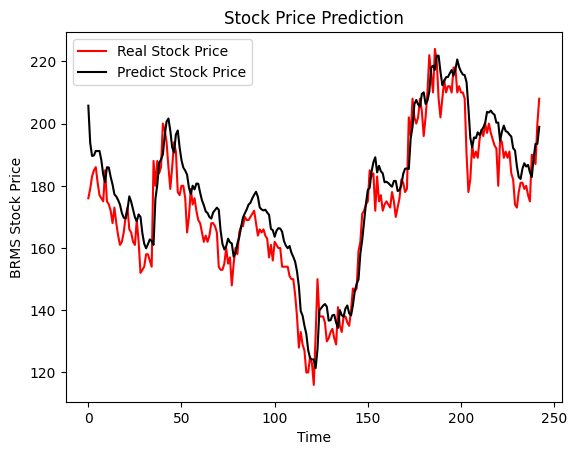

In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("BRMS Stock Price")
plt.legend()
plt.show()